# AI Assignment – 2022 Batch
### Total Marks: 10

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import ttest_1samp, chi2_contingency
from scipy.integrate import odeint, solve_ivp

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# Load CSV
df = pd.read_csv('patient_data.csv')
df.head()

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High


## Q1: Outlier Detection and Feature Reduction (2 Marks)

In [3]:
numeric_df = df.select_dtypes(include=[np.number])
selector = VarianceThreshold(threshold=0.0)
reduced_array = selector.fit_transform(numeric_df)
selected_columns = numeric_df.columns[selector.get_support()]
df_reduced = pd.DataFrame(reduced_array, columns=selected_columns)
for col in selected_columns:
    df[col] = df_reduced[col]

# Remove outliers in CholesterolLevel
Q1 = df['CholesterolLevel'].quantile(0.25)
Q3 = df['CholesterolLevel'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['CholesterolLevel'] >= Q1 - 1.5 * IQR) & (df['CholesterolLevel'] <= Q3 + 1.5 * IQR)]

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)
df.head()

/tmp/ipython-input-3-4162984836.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(numeric_only=True), inplace=True)
/tmp/ipython-input-3-4162984836.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna("Unknown", inplace=True)


,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1.0,Male,37.0,193.4,129.4,East,High
1,2.0,Female,45.0,210.7,107.1,West,Low
2,3.0,Male,63.0,244.3,103.9,West,Low
3,4.0,Male,53.0,184.5,127.2,West,High
4,5.0,Male,29.0,175.7,116.6,South,High


## Q2: Data Visualization (2 Marks)

/tmp/ipython-input-4-800159201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskCategory', y='BloodPressure', palette='Set2')


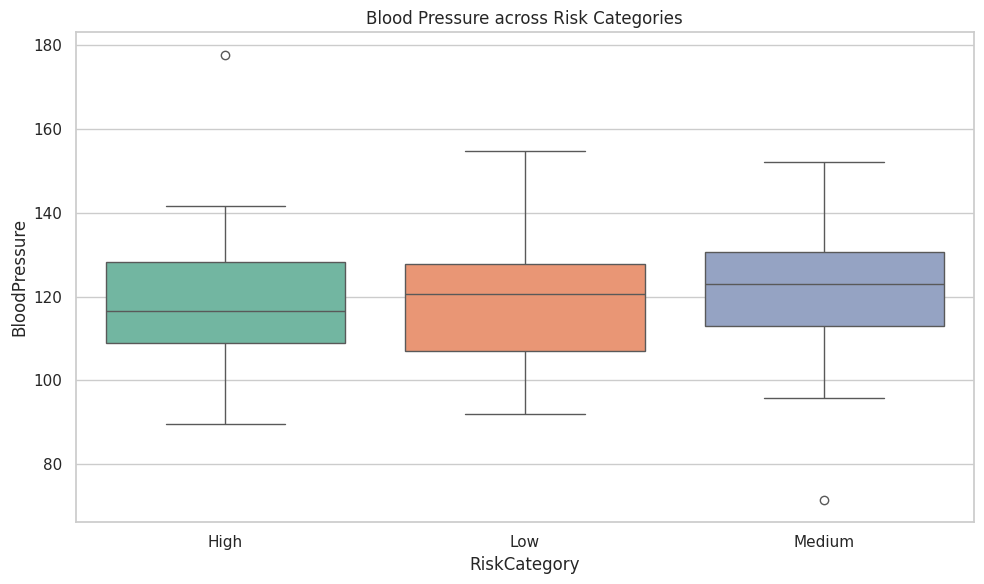

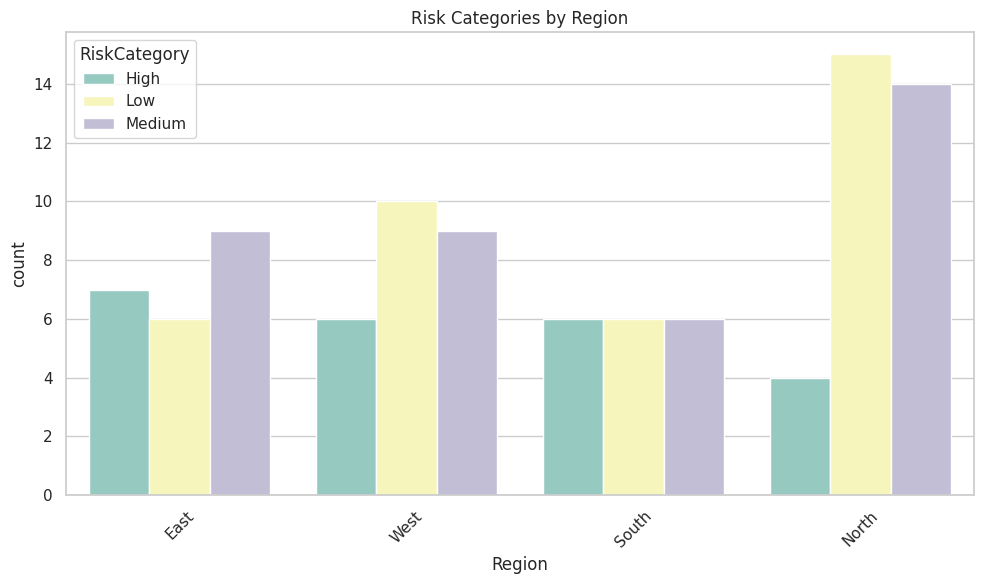

In [4]:
# Boxplot
sns.boxplot(data=df, x='RiskCategory', y='BloodPressure', palette='Set2')
plt.title("Blood Pressure across Risk Categories")
plt.tight_layout()
plt.show()

# Countplot
sns.countplot(data=df, x='Region', hue='RiskCategory', palette='Set3')
plt.title("Risk Categories by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Q3: Statistical Hypothesis Testing (3 Marks)

In [5]:
# One-sample t-test
sample = df['CholesterolLevel'].sample(20, random_state=42)
t_stat, p_val = ttest_1samp(sample, popmean=200)
print("One-sample t-test:")
print(f"Sample Mean = {sample.mean():.2f}")
print(f"T-Statistic = {t_stat:.4f}")
print(f"P-Value = {p_val:.4f}")
if p_val < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

# Chi-square test
contingency_table = pd.crosstab(df['Region'], df['RiskCategory'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test:")
print(f"Chi2 = {chi2:.4f}, p = {p:.4f}, dof = {dof}")
if p < 0.05:
    print("Reject the null hypothesis (dependent).")
else:
    print("Fail to reject the null hypothesis (independent).")

One-sample t-test:
Sample Mean = 207.69
T-Statistic = 1.1450
P-Value = 0.2664
Fail to reject the null hypothesis.

Chi-Square Test:
Chi2 = 4.8247, p = 0.5665, dof = 6
Fail to reject the null hypothesis (independent).


## Q4: Modeling a Health System with ODE (3 Marks)

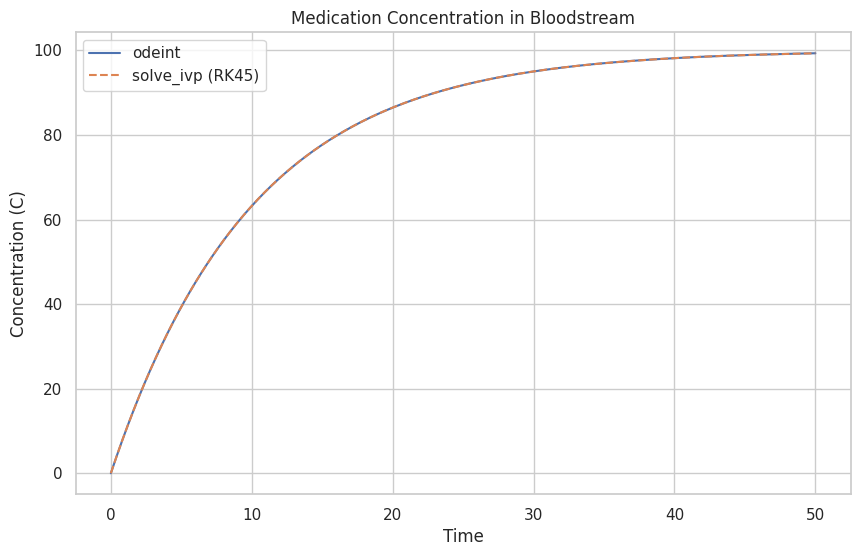

Both solvers show an exponential rise toward D = 100 mg/dL.


In [6]:
# Define model for odeint
k, D = 0.1, 100
t = np.linspace(0, 50, 500)
def model(C, t):
    return k * (D - C)
C_odeint = odeint(model, y0=[0], t=t).flatten()

# Define model for solve_ivp
def model_ivp(t, C):
    return k * (D - C)
sol = solve_ivp(model_ivp, [0, 50], [0], t_eval=t)
C_ivp = sol.y[0]

# Plot both
plt.plot(t, C_odeint, label='odeint')
plt.plot(t, C_ivp, '--', label='solve_ivp (RK45)')
plt.xlabel('Time')
plt.ylabel('Concentration (C)')
plt.title('Medication Concentration in Bloodstream')
plt.legend()
plt.grid(True)
plt.show()

print("Both solvers show an exponential rise toward D = 100 mg/dL.")